In [47]:
%load_ext autoreload
%autoreload 2

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
model = HouseholdSpecializationModelClass()

print(model.par)

namespace(rho=2.0, nu=0.001, epsilon=1.0, omega=0.5, alpha=0.5, sigma=1.0, wM=1.0, wF=1.0, wF_vec=array([0.8, 0.9, 1. , 1.1, 1.2]), beta0_target=0.4, beta1_target=-0.1)


In [102]:
solutions = {}
solutions['HF'] = []
solutions['HM'] = []
solutions['WF'] = []
solutions['WM'] = []

for i in [0.8, 0.9, 1.0, 1.1, 1.2]:
    model.par.wF = i
    solution = model.solve()
    solutions['HF'].append(solution.HF)
    solutions['HM'].append(solution.HM)
    solutions['WF'].append(model.par.wF)
    solutions['WM'].append(model.par.wM)

#
df = pd.DataFrame(solutions)


In [112]:
contionoussolution = model.solve_wF_vec(discrete=False)

df1 = {}
df1['HF'] = contionoussolution.HF_vec
df1['HM'] = contionoussolution.HM_vec

df1 = pd.DataFrame(df1)
df1



,HF,HM
0,5.095738,4.087068
1,4.493532,4.489155
2,4.454001,4.454001
3,4.415348,4.419206
4,4.377734,4.385003


In [114]:
df['logHF/logHM'] = np.log(df['HF']) - np.log(df['HM'])

df['logWF/logWM'] = np.log(df['WF']) - np.log(df['WM'])


df

,HF,HM,WF,WM,logHF/logHM,logWF/logWM
0,5.095738,4.087068,0.8,1.0,2.205766e-01,-0.223144
1,4.493532,4.489155,0.9,1.0,9.744259e-04,-0.105361
2,4.454001,4.454001,1.0,1.0,6.119879e-09,0.000000
3,4.415348,4.419206,1.1,1.0,-8.732651e-04,0.095310
4,4.377734,4.385003,1.2,1.0,-1.659164e-03,0.182322


In [ ]:
a = model.solve()

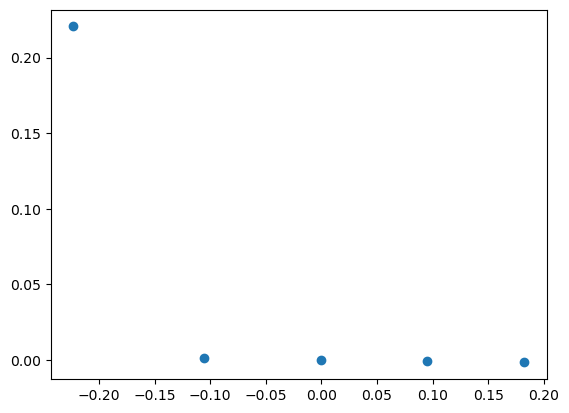

In [104]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['logWF/logWM'], df['logHF/logHM'])


NameError: name 'df' is not defined

In [21]:
print(model.solve())

namespace(LM=5.902199116694388, HM=4.0870678794830235, LF=2.8794249702098367, HF=5.095737687417739)


In [10]:
# Assignment 1

# assign class from module
model = HouseholdSpecializationModelClass()

# this is how we change the par(ameter) values in HSMC:
HSMC.par.alpha = 0.5
HSMC.par.sigma = 1

# our discrete solution is an SimpleNamespace
solution = HSMC.solve_discrete()

# which we can print as defined in class
HSMC.solve_discrete(do_print=True)

# we can unpack our solution as a dictionary 
dict_sol = vars(solution)


# ... and store as variables
LM, HM, LF, HF = dict_sol.values()
print(LM, HM, LF, HF)


# KJT: missing plotting


# note: i have added a __str__ to the class, so we always can see the baseline parameters
HSMC.par.rho=69
print(HSMC)

HSMC.par.rho=2
print(HSMC)  



start solve_discrete()
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
end solve_discrete()
4.5 4.5 4.5 4.5

 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (69.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.00) 


 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.00) 



In [ ]:
# assignment 3

print(HSMC)

# solve continously
HSMC.solve(do_print=True)

# results seems to be aligned with the discrete solution, check for base values
HSMC.solve_discrete(do_print=True)

# for different values for wF, see function .solve_wF_vec, not sure if right way.
wF_vec_SOL = HSMC.solve_wF_vec(do_print=True)

print(HSMC)

# KJT: need to plot.



 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)                   = (1.00, 1.00) 

start solve()
LM = 4.4540
HM = 4.4540
LF = 4.4540
HF = 4.4540
end solve()
start solve_discrete()
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
end solve_discrete()
start solve_wF_vec()
wf_vec = [0.8 0.9 1.  1.1 1.2]
LM_vec = [5.90219912 4.67971036 4.45400058 4.24673723 4.05670539]
HM_vec = [4.08706788 4.48915532 4.45400056 4.41920581 4.385003  ]
LF_vec = [2.87942497 4.298631   4.45400058 4.5844395  4.69404487]
HF_vec = [5.09573769 4.4935318  4.45400058 4.41534835 4.3777336 ]
end solve_wF_vec()

 The baseline parameters in the model is: 
1. Preferences           = (rho, epsilon, omega, nu) = (2.00, 1.00, 0.50, 0.001) 
2. Household production  = (alpha, sigma )           = (0.50, 1.00) 
3. Wages                 = (wM,wF)     

## UNDERSTAND MODULE

In [ ]:
# for solve_discrete

x = np.linspace(0,24,49)
LM,HM,LF,HF = np.meshgrid(x,x,x,x) 

LM = LM.ravel()

print(LM, len(LM))
print(49**4)

[ 0.  0.  0. ... 24. 24. 24.] 5764801
5764801


In [ ]:
model = 